# Financial analytics of S&P 500 and the VIX

## IEXfin

Khong dung tot duoc, kho su dung

In [ ]:
!pip install iexfinance

     |████████████████████████████████| 51kB 1.5MB/s 


In [ ]:
from iexfinance.refdata import get_symbols
token="pk_43b75da6f5ca44d98ae749dbba17ce7a"
get_symbols(output_format='pandas', token=token)

,symbol,exchange,name,date,type,iexId,region,currency,isEnabled,figi,cik
0,A,NYS,Agilent Technologies Inc.,2020-07-21,cs,IEX_46574843354B2D52,US,USD,True,BBG000C2V3D6,1090872
1,AA,NYS,Alcoa Corp.,2020-07-21,cs,IEX_4238333734532D52,US,USD,True,BBG00B3T3HD3,1675149
2,AAAU,PSE,Perth Mint Physical Gold ETF,2020-07-21,et,IEX_474B433136332D52,US,USD,True,BBG00LPXX872,None
3,AACG,NAS,ATA Creativity Global Sponsored ADR,2020-07-21,ad,IEX_44595A4C53392D52,US,USD,True,BBG000V2S3P6,None
4,AACQU,NAS,Artius Acquisition Inc. Units Cons of 1 Shs A ...,2020-07-21,ut,IEX_474656574E422D52,US,USD,True,BBG00VQPPKH7,None
...,...,...,...,...,...,...,...,...,...,...,...
8898,ZUO,NYS,Zuora Inc. Class A,2020-07-21,cs,IEX_4D474631525A2D52,US,USD,True,BBG000BT3HG5,1423774
8899,ZVO,NAS,Zovio Inc.,2020-07-21,cs,IEX_514A435352362D52,US,USD,True,BBG000C3CQP1,1305323
8900,ZYME,NYS,Zymeworks Inc.,2020-07-21,cs,IEX_5253315838322D52,US,USD,True,BBG00GD15LJ5,1403752
8901,ZYNE,NAS,Zynerba Pharmaceuticals Inc,2020-07-21,cs,IEX_4E3154424A382D52,US,USD,True,BBG007BBS8B7,1621443


In [ ]:
from iexfinance.stocks import Stock

a = Stock("AAPL", token=token)
a.get_quote()

{'avgTotalVolume': 36166185,
 'calculationPrice': 'close',
 'change': 8.12,
 'changePercent': 0.02107,
 'close': None,
 'closeSource': 'official',
 'closeTime': None,
 'companyName': 'Apple, Inc.',
 'delayedPrice': None,
 'delayedPriceTime': None,
 'extendedChange': None,
 'extendedChangePercent': None,
 'extendedPrice': None,
 'extendedPriceTime': None,
 'high': None,
 'highSource': '15 minute delayed price',
 'highTime': 1595289598656,
 'iexAskPrice': 406.51,
 'iexAskSize': 100,
 'iexBidPrice': 0,
 'iexBidSize': 0,
 'iexClose': 393.46,
 'iexCloseTime': 1595275199308,
 'iexLastUpdated': 0,
 'iexMarketPercent': None,
 'iexOpen': None,
 'iexOpenTime': None,
 'iexRealtimePrice': 0,
 'iexRealtimeSize': 0,
 'iexVolume': 0,
 'isUSMarketOpen': False,
 'lastTradeTime': 1595275200547,
 'latestPrice': 393.43,
 'latestSource': 'Close',
 'latestTime': 'July 20, 2020',
 'latestUpdate': 1595275200547,
 'latestVolume': None,
 'low': None,
 'lowSource': '15 minute delayed price',
 'lowTime': 15952522

## Tingo OK

In [ ]:
!pip install tiingo

In [ ]:
from tiingo import TiingoClient
config = {}

# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "47eea91d37bcf30b4e1e3ef0365846e8041b4aa8"

# Initialize
client = TiingoClient(config)

In [ ]:
#Get a pd.DataFrame for a list of symbols for a specified metric_name (default is adjClose if no
#metric_name is specified):
ticker_history = client.get_dataframe(['GOOGL', 'AAPL'],
                                      frequency='weekly',
                                      metric_name='volume',
                                      startDate='2017-01-01',
                                      endDate='2018-05-31')
ticker_history

,GOOGL,AAPL
date,,
2016-12-30 00:00:00+00:00,4983989,84828531
2017-01-06 00:00:00+00:00,6832004,103845468
2017-01-13 00:00:00+00:00,6572250,138810760
2017-01-20 00:00:00+00:00,4845240,116347987
2017-01-27 00:00:00+00:00,13053648,124748449
...,...,...
2018-05-04 00:00:00+00:00,9034426,252805668
2018-05-11 00:00:00+00:00,8725368,148266951
2018-05-18 00:00:00+00:00,8096281,99248752


In [ ]:
# Check what tickers are available, as well as metadata about each ticker
# including supported currency, exchange, and available start/end dates.
tickers = client.list_stock_tickers()
pd.DataFrame(tickers)

,ticker,exchange,assetType,priceCurrency,startDate,endDate
0,000001,SHE,Stock,CNY,2007-08-30,2020-07-20
1,000002,SHE,Stock,CNY,2000-01-04,2020-07-20
2,000003,SHE,Stock,CNY,,
3,000004,SHE,Stock,CNY,2007-08-31,2020-07-20
4,000005,SHE,Stock,CNY,2001-01-02,2020-07-20
...,...,...,...,...,...,...
41542,ZZK,NYSE ARCA,Stock,USD,,
41543,ZZLL,OTCBB,Stock,USD,2017-09-26,2020-06-22
41544,ZZLLD,OTCBB,Stock,USD,2017-10-06,2017-10-30
41545,ZZZ,NYSE ARCA,Stock,USD,2014-10-31,2017-09-18


In [ ]:
#Get a pd.DataFrame of the price history of a single symbol (default is daily):
ticker_history = client.get_dataframe("GOOGL")
ticker_history

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
date,,,,,,,,,,,,
2020-07-20 00:00:00+00:00,1563.84,1569.01,1502.7,1515.0,1490600,1563.84,0.0,1569.01,1502.7,1515.0,1.0,1490600


In [ ]:
#Get a pd.Series of only one column of the available response data by specifying one of the valid the
#'metric_name' parameters:
ticker_history = client.get_dataframe("GOOGL", metric_name='adjClose')
ticker_history

date
2020-07-20 00:00:00+00:00    1563.84
Name: adjClose, dtype: float64

## Yahoo_fin OK

In [ ]:
!pip install yahoo_fin

In [ ]:
!pip install requests_html

     |████████████████████████████████| 153kB 8.8MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 133kB 14.5MB/s 
  Created wheel for parse: filename=parse-1.15.0-cp36-none-any.whl size=23710 sha256=c38302708ef34ccfcb39add5316bb3d35458327509b206c21d271e8f15b1ad07
  Stored in directory: /root/.cache/pip/wheels/07/ee/c8/eced0759f09fc635398ab1b8e89c38549b28e5db7fd4a53ba5
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp36-none-any.whl size=13484 sha256=57130b07cde7300036ae715594b6f7d40efefa990177fa8e0e9f098eabf2adb8
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built parse fake-useragent
ERROR: kaggle 1.5.6 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.9 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is i

In [ ]:
from yahoo_fin.stock_info import get_data

In [ ]:
df_spx_data= get_data("^GSPC",start_date = '01/03/2000',index_as_date = True, interval="1d")
df_spx_data

,open,high,low,close,adjclose,volume,ticker
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,^GSPC
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,^GSPC
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,^GSPC
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,^GSPC
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,^GSPC
...,...,...,...,...,...,...,...
2020-07-15,3225.979980,3238.280029,3200.760010,3226.560059,3226.560059,4669760000,^GSPC
2020-07-16,3208.360107,3220.389893,3198.590088,3215.570068,3215.570068,3961230000,^GSPC
2020-07-17,3224.209961,3233.520020,3205.649902,3224.729980,3224.729980,3993830000,^GSPC
2020-07-20,3224.290039,3258.610107,3215.159912,3251.840088,3251.840088,3971200000,^GSPC


In [ ]:
df_vix_data= get_data("^VIX",start_date = '01/03/2000',index_as_date = True, interval="1d")
df_vix_data

,open,high,low,close,adjclose,volume,ticker
2000-01-03,24.360001,26.150000,23.980000,24.209999,24.209999,0,^VIX
2000-01-04,24.940001,27.180000,24.799999,27.010000,27.010000,0,^VIX
2000-01-05,27.980000,29.000000,25.850000,26.410000,26.410000,0,^VIX
2000-01-06,26.680000,26.709999,24.700001,25.730000,25.730000,0,^VIX
2000-01-07,25.139999,25.170000,21.719999,21.719999,21.719999,0,^VIX
...,...,...,...,...,...,...,...
2020-07-15,29.150000,30.090000,27.170000,27.760000,27.760000,0,^VIX
2020-07-16,28.410000,29.290001,26.980000,28.000000,28.000000,0,^VIX
2020-07-17,27.150000,27.540001,25.410000,25.680000,25.680000,0,^VIX
2020-07-20,26.940001,27.080000,24.350000,24.459999,24.459999,0,^VIX


In [ ]:
import pandas as pd

df = pd.DataFrame(columns=['SPX', 'VIX'])
df['SPX'] = df_spx_data['adjclose']
df['VIX'] = df_vix_data['adjclose']

df.index = pd.to_datetime(df.index)
df.head()

,SPX,VIX
2000-01-03,1455.219971,24.209999
2000-01-04,1399.420044,27.010000
2000-01-05,1402.109985,26.410000
2000-01-06,1403.449951,25.730000
2000-01-07,1441.469971,21.719999


In [ ]:
df.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-13',
               '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-20', '2020-07-21'],
              dtype='datetime64[ns]', length=5170, freq=None)

## Performing analytics

In [ ]:
df.describe()

,SPX,VIX
count,5170.000000,5170.000000
mean,1613.665640,19.834182
std,624.621706,8.981937
min,676.530029,9.140000
25%,1158.400055,13.550000
50%,1374.054993,17.469999
75%,2041.970001,23.379999
max,3386.149902,82.690002


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5170 entries, 2000-01-03 to 2020-07-21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5170 non-null   float64
 1   VIX     5170 non-null   float64
dtypes: float64(2)
memory usage: 121.2 KB


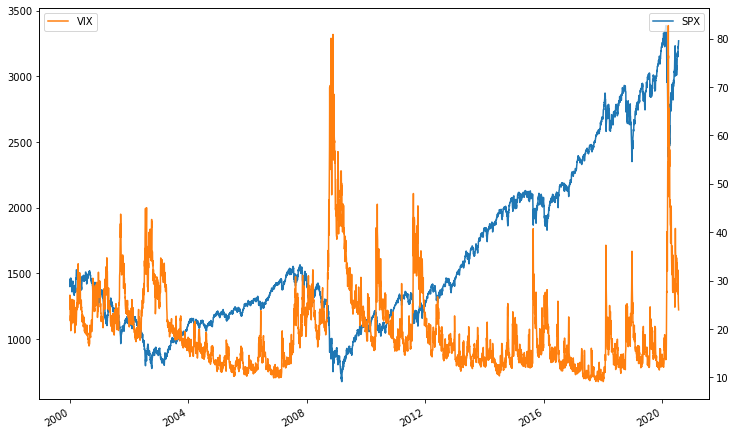

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))

ax_spx = df['SPX'].plot()
ax_vix = df['VIX'].plot(secondary_y=True)

ax_spx.legend(loc=1)
ax_vix.legend(loc=2)

plt.show();

Observe that when the S&P 500 moves up, the VIX appears to
move downwards, exhibiting a negative correlation
relationship. We need to perform more statistical analysis to
be sure.

Perhaps we might be interested in the daily returns of both the
indexes. The diff() method returns the set of differences
between the prior period values. A histogram can be used to
give us a rough sense of the data density estimation over a bin
interval of 100:

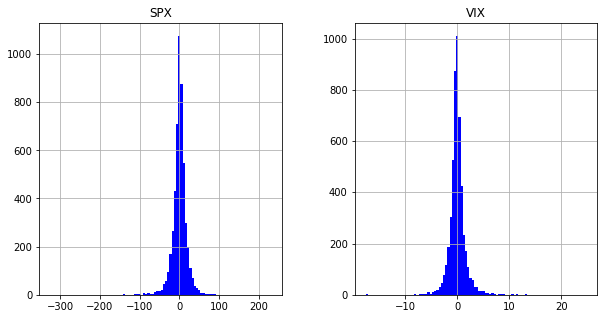

In [ ]:
df.diff().hist(
    figsize=(10, 5),
    color='blue',
    bins=100);

The same effect can also be achieved with the pct_change()
command that gives us the percentage change over the prior
period values:

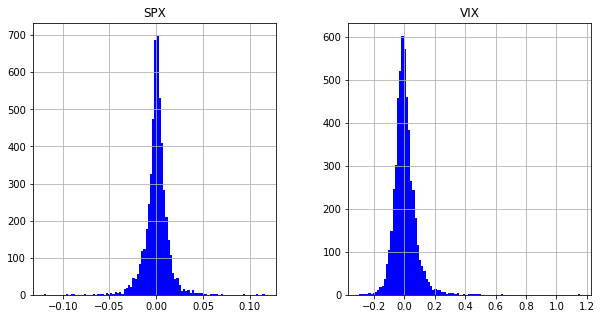

In [ ]:
df.pct_change().hist(
    figsize=(10, 5),
     color='blue',
     bins=100);

For quantitative analysis of returns, we are interested in the
logarithm of daily returns. Why use log returns over simple
returns? There are several reasons, but the most important of
them is normalization, and this avoids the problem of negative
prices.

In [ ]:
import numpy as np
df / df.shift(1)

,SPX,VIX
2000-01-03,NaN,NaN
2000-01-04,0.961655,1.115655
2000-01-05,1.001922,0.977786
2000-01-06,1.000956,0.974252
2000-01-07,1.027090,0.844151
...,...,...
2020-07-15,1.009082,0.940379
2020-07-16,0.996594,1.008646
2020-07-17,1.002849,0.917143
2020-07-20,1.008407,0.952492


In [ ]:
log_returns = np.log(df / df.shift(1)).dropna()
log_returns

,SPX,VIX
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424
2000-01-10,0.011128,-0.000461
...,...,...
2020-07-15,0.009041,-0.061472
2020-07-16,-0.003412,0.008608
2020-07-17,0.002845,-0.086492
2020-07-20,0.008372,-0.048673


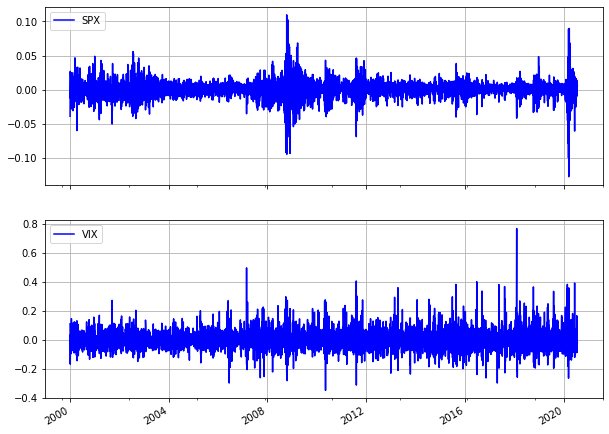

In [ ]:

log_returns.plot(
    subplots=True,
    figsize=(10, 8),
    color='blue',
    grid=True
);
for ax in plt.gcf().axes:
    ax.legend(loc='upper left')

## Correlation between SPX and VIX

In [ ]:
log_returns

,SPX,VIX
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424
2000-01-10,0.011128,-0.000461
...,...,...
2020-07-15,0.009041,-0.061472
2020-07-16,-0.003412,0.008608
2020-07-17,0.002845,-0.086492
2020-07-20,0.008372,-0.048673


In [ ]:
log_returns.corr()

,SPX,VIX
SPX,1.000000,-0.729657
VIX,-0.729657,1.000000


At -0.731433, the SPX is negatively correlated with the VIX. To
help us better visualize this relationship, we can plot both sets
of the daily log return values as a scatter plot. The statsmodels.api
module is used to obtain the ordinary least squares regression
line between the scattered data:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


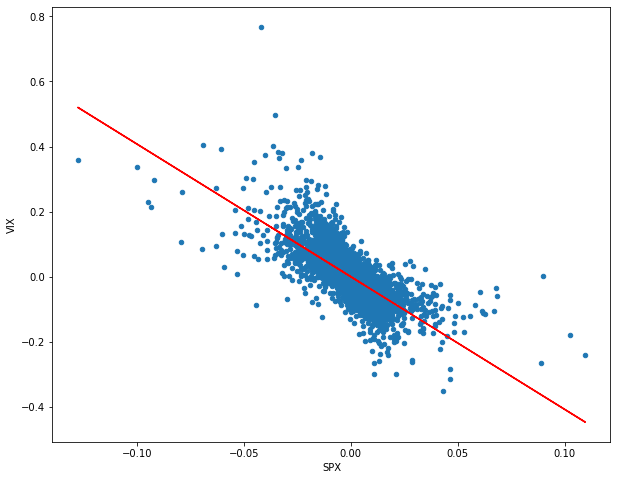

In [ ]:
import statsmodels.api as sm

log_returns.plot(
    figsize=(10,8),
     x="SPX",
     y="VIX",
     kind='scatter')

ols_fit = sm.OLS(log_returns['VIX'].values,log_returns['SPX'].values).fit()

plt.plot(log_returns['SPX'], ols_fit.fittedvalues, 'r');

The downward-sloping regression line, as shown in the
preceding graph, confirms the negative correlation
relationship between the S&P 500 and the VIX indices.
The rolling().corr() method of pandas computes the movingwindow correlation between two time series. We use a value
of 252 to represent the number of trading days in the moving
window to compute the annual rolling correlation, using the
following commands:

In [ ]:
df['SPX'].rolling(252).mean()

2000-01-03            NaN
2000-01-04            NaN
2000-01-05            NaN
2000-01-06            NaN
2000-01-07            NaN
                 ...     
2020-07-15    3013.932416
2020-07-16    3014.849678
2020-07-17    3015.760868
2020-07-20    3016.853051
2020-07-21    3017.984518
Name: SPX, Length: 5170, dtype: float64

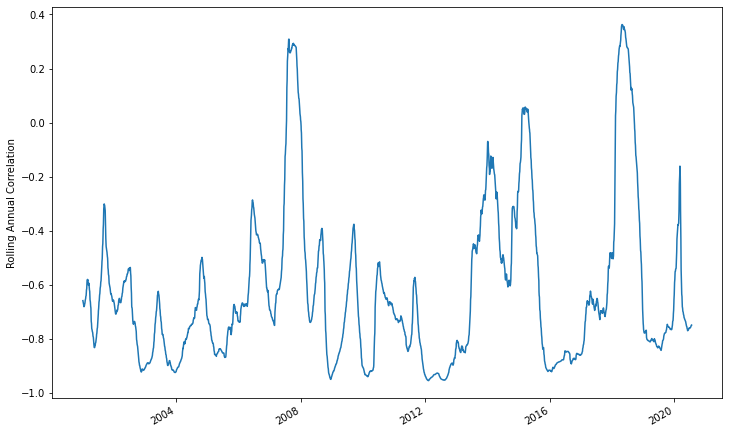

In [ ]:
plt.ylabel('Rolling Annual Correlation')

df_corr = df['SPX'].rolling(252).corr(other=df['VIX'])
df_corr.plot(figsize=(12,8));

It can be seen from the preceding graph that the SPX and the
VIX are negatively correlated, fluctuating between 0.0 and -0.9 during most of the lifetime of the indices using 252 trading
days per year.

# Calculating the VIX index

In [ ]:
import csv 

META_DATA_ROWS = 3  # Header data starts at line 4
COLS = 7  # Each option data occupy 7 columns

def read_file(filepath):
    meta_rows = []
    calls_and_puts = []

    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        for row, cells in enumerate(reader):
            if row < META_DATA_ROWS:
                meta_rows.append(cells)
            else:
                call = cells[:COLS]
                put = cells[COLS:-1]

                calls_and_puts.append((call, put))                        

    return (meta_rows, calls_and_puts)

In [ ]:
(meta_rows, calls_and_puts) = \
    read_file('/content/drive/My Drive/Colab Notebooks/Master Python for finance Packt/files/chapter07/SPX_EOD_2018_10_15.csv')

In [ ]:
for line in meta_rows:
    print(line)

['SPX (S&P 500 INDEX)', '2750.79', '-16.34']
['Oct 15 2018 @ 20:00 ET']
['Calls', 'Last Sale', 'Net', 'Bid', 'Ask', 'Vol', 'Open Int', 'Puts', 'Last Sale', 'Net', 'Bid', 'Ask', 'Vol', 'Open Int']


In [ ]:
from dateutil import parser

def get_dt_current(meta_rows):
    """
    Extracts time information.

    :param meta_rows: 2D array
    :return: parsed datetime object
    """
    # First cell of second row contains time info
    date_time_row = meta_rows[1][0]

    # Format text as ET time string
    current_time = date_time_row.strip()\
        .replace('@ ', '')\
        .replace('ET', '-05:00')\
        .replace(',', '')

    dt_current =  parser.parse(current_time)
    return dt_current

In [ ]:
dt_current =  get_dt_current(meta_rows)
print(dt_current)

2018-10-15 20:00:00-05:00


In [ ]:
for line in calls_and_puts[:2]:
    print(line)

(['2018 Oct 15 1700.00 (SPXW1815J1700)', '0.0', '0.0', '1039.30', '1063.00', '0', '0'], ['2018 Oct 15 1700.00 (SPXW1815V1700)', '0.15', '0.0', ' ', '0.05', '0'])
(['2018 Oct 15 1800.00 (SPXW1815J1800)', '0.0', '0.0', '939.40', '963.00', '0', '0'], ['2018 Oct 15 1800.00 (SPXW1815V1800)', '0.10', '0.0', ' ', '0.05', '0'])


In [ ]:
from decimal import Decimal

def parse_expiry_and_strike(text):
    """
    Extracts information about the contract data.

    :param text: the string to parse.
    :return: a tuple of expiry date and strike price
    """
    # SPX Weeklys should expire at 3PM Chicago time.
    [year, month, day, strike, option_code] = text.split(' ')
    expiry = '%s %s %s 3:00PM -05:00' % (year, month, day)
    dt_object = parser.parse(expiry)    

    """
    Third friday SPX standard options expire at start of trading
    8.30 A.M. Chicago time.
    """
    if is_third_friday(dt_object):
        dt_object = dt_object.replace(hour=8, minute=30)

    strike = Decimal(strike)    
    return (dt_object, strike)

In [ ]:
def is_third_friday(dt_object):
    return dt_object.weekday() == 4 and 15 <= dt_object.day <= 21

Testing our function with a simple contract code data and printing the results:

In [ ]:
test_contract_code = '2018 Sep 26 1800.00 (*)'
(expiry, strike) = parse_expiry_and_strike(test_contract_code)

In [ ]:
print('Expiry:', expiry)
print('Strike price:', strike)

Expiry: 2018-09-26 15:00:00-05:00
Strike price: 1800.00


This time round, let's test our function with a contract code data that falls on a third Friday.

In [ ]:
test_contract_code = '2018 Oct 19 2555.00 (*)'
(expiry, strike) = parse_expiry_and_strike(test_contract_code)

In [ ]:
print('Expiry:', expiry)
print('Strike price:', strike)

Expiry: 2018-10-19 08:30:00-05:00
Strike price: 2555.00


With our utility function in place, we can now go ahead and parse a single call or put option price entry, and return useful information which we can use:

In [ ]:
def format_option_data(option_data):
    [desc, _, _, bid_str, ask_str] = option_data[:5]
    bid = Decimal(bid_str.strip() or '0')
    ask = Decimal(ask_str.strip() or '0')
    mid = (bid+ask) / Decimal(2)
    (expiry, strike) = parse_expiry_and_strike(desc)
    return (expiry, strike, bid, ask, mid)

## Finding near-term and next-term options

In [ ]:
CALL_COLS = ['call_bid', 'call_ask', 'call_mid']
PUT_COLS = ['put_bid', 'put_ask', 'put_mid']
COLUMNS = CALL_COLS + PUT_COLS + ['diff']

In [ ]:
import pandas as pd

def generate_options_chain(calls_and_puts):
    chain = {}

    for row in calls_and_puts:
        (call, put) = row

        (call_expiry, call_strike, call_bid, call_ask, call_mid) = \
            format_option_data(call)
        (put_expiry, put_strike, put_bid, put_ask, put_mid) = \
            format_option_data(put)

        # Ensure each line contains the same put and call maturity
        assert(call_expiry == put_expiry)

        # Get or create the DataFrame at the expiry
        df = chain.get(call_expiry, pd.DataFrame(columns=COLUMNS))

        df.loc[call_strike, CALL_COLS] = \
            [call_bid, call_ask, call_mid]
        df.loc[call_strike, PUT_COLS] = \
            [put_bid, put_ask, put_mid]
        df.loc[call_strike, 'diff'] = abs(put_mid-call_mid)

        chain[call_expiry] = df

    return chain

In [ ]:
chain = generate_options_chain(calls_and_puts)

In [ ]:
chain_keys = list(chain.keys())
for row in chain_keys[:2]:
    print(row)
print('...')
for row in chain_keys[-2:]:
    print(row)

2018-10-15 15:00:00-05:00
2018-10-17 15:00:00-05:00
...
2020-06-19 08:30:00-05:00
2020-12-18 08:30:00-05:00


In [ ]:
def find_option_terms(chain, dt_current):
    """
    Find the near-term and next-term dates from
    the given indexes of the dictionary.

    :param chain: dictionary object
    :param dt_current: DateTime object of option quotes
    :return: tuple of 2 datetime objects
    """
    dt_near = None
    dt_next = None

    for dt_object in chain.keys():
        delta = dt_object - dt_current
        if delta.days > 23:
            # Skip non-fridays
            if dt_object.weekday() != 4:
                continue

            # Save the near term date
            if dt_near is None:
                dt_near = dt_object            
                continue

            # Save the next term date
            if dt_next is None:
                dt_next = dt_object            
                break

    return (dt_near, dt_next)

In [ ]:
(dt_near, dt_next) = find_option_terms(chain, dt_current)

In [ ]:
print('Found near-term maturity', dt_near, 
      'with', dt_near-dt_current, 'to expiry')
print('Found next-term maturity', dt_next, 
      'with', dt_next-dt_current, 'to expiry')

Found near-term maturity 2018-11-09 15:00:00-05:00 with 24 days, 19:00:00 to expiry
Found next-term maturity 2018-11-16 08:30:00-05:00 with 31 days, 12:30:00 to expiry


## Calculating the required minutes

In [ ]:
dt_start_year = dt_current.replace(
    month=1, day=1, hour=0, minute=0, second=0)
dt_end_year = dt_start_year.replace(year=dt_current.year+1)

N_t1 = Decimal((dt_near-dt_current).total_seconds() // 60)
N_t2 = Decimal((dt_next-dt_current).total_seconds() // 60)
N_30 = Decimal(30 * 24 * 60)
N_365 = Decimal((dt_end_year-dt_start_year).total_seconds() // 60)

In [ ]:
print('N_365:', N_365)
print('N_30:', N_30)
print('N_t1:', N_t1)
print('N_t2:', N_t2)

N_365: 525600
N_30: 43200
N_t1: 35700
N_t2: 45390


In [ ]:
t1 = N_t1 / N_365
t2 = N_t2 / N_365

In [ ]:
print('t1:%.5f'%t1)
print('t2:%.5f'%t2)

t1:0.06792
t2:0.08636


## Calculating the forward SPX index level

In [ ]:
import math

def determine_forward_level(df, r, t):
    """
    Calculate the forward SPX index level.

    :param df: pandas DataFrame for a single option chain
    :param r: risk-free interest rate for t
    :param t: time to settlement in years
    :return: Decimal object
    """
    min_diff = min(df['diff'])
    pd_k = df[df['diff'] == min_diff]
    k = pd_k.index.values[0]

    call_price = pd_k.loc[k, 'call_mid']
    put_price = pd_k.loc[k, 'put_mid']
    return k + Decimal(math.exp(r*t))*(call_price-put_price)

In [ ]:
r = Decimal(2.17/100)

In [ ]:
df_near = chain.get(dt_near)
f1 = determine_forward_level(df_near, r, t1)

In [ ]:
print('f1:', f1)

f1: 2747.596459994546094129930225


## Finding the required forward strike prices

In [ ]:
def find_k0(df, f):
    return df[df.index<f].tail(1).index.values[0]

In [ ]:
k0_near = find_k0(df_near, f1)

In [ ]:
print('k0_near:', k0_near)

k0_near: 2745.00


## Determining strike price boundaries

In [ ]:
def find_lower_and_upper_bounds(df, k0):
    """
    Find the lower and upper boundry strike prices.

    :param df: the pandas DataFrame of option chain
    :param k0: the forward strike price
    :return: a tuple of two Decimal objects
    """
    # Find lower bound
    otm_puts = df[df.index<k0].filter(['put_bid', 'put_ask'])
    k_lower = 0
    for i, k in enumerate(otm_puts.index[::-1][:-2]):
        k_lower = k
        put_bid_t1 = otm_puts.iloc[-i-1-1]['put_bid']
        put_bid_t2 = otm_puts.iloc[-i-1-2]['put_bid']
        if put_bid_t1 == 0 and put_bid_t2 == 0:
            break
        if put_bid_t2 == 0:
            k_lower = otm_puts.index[-i-1-1]

    # Find upper bound
    otm_calls = df[df.index>k0].filter(['call_bid', 'call_ask'])    
    k_upper = 0
    for i, k in enumerate(otm_calls.index[:-2]):
        call_bid_t1 = otm_calls.iloc[i+1]['call_bid']
        call_bid_t2 = otm_calls.iloc[i+2]['call_bid']
        if call_bid_t1 == 0 and call_bid_t2 == 0:
            k_upper = k
            break

    return (k_lower, k_upper)

In [ ]:
(k_lower_near, k_upper_near) = \
    find_lower_and_upper_bounds(df_near, k0_near)

In [ ]:
print(k_lower_near, k_upper_near)

1250.00 3040.00


## Tabulating contributions by strike prices

In [ ]:
def calculate_contrib_by_strike(delta_k, k, r, t, q):
    return (delta_k / k**2)*Decimal(math.exp(r*t))*q

In [ ]:
def find_prev_k(k, i, k_lower, df, bid_column):
    """
    Finds the strike price immediately below k 
    with non-zero bid.

    :param k: current strike price at i
    :param i: current index of df
    :param k_lower: lower strike price boundary of df
    :param bid_column: The column name that reads the bid price.
        Can be 'put_bid' or 'call_bid'.
    :return: strike price as Decimal object.
    """    
    if k <= k_lower:
        k_prev = df.index[i-1]
        return k_prev

    # Iterate backwards to find put bids           
    k_prev = 0
    prev_bid = 0
    steps = 1
    while prev_bid == 0:                                
        k_prev = df.index[i-steps]
        prev_bid = df.loc[k_prev][bid_column]
        steps += 1

    return k_prev

In [ ]:
def find_next_k(k, i, k_upper, df, bid_column):
    """
    Finds the strike price immediately above k 
    with non-zero bid.

    :param k: current strike price at i
    :param i: current index of df
    :param k_upper: upper strike price boundary of df
    :param bid_column: The column name that reads the bid price.
        Can be 'put_bid' or 'call_bid'.
    :return: strike price as Decimal object.
    """    
    if k >= k_upper:
        k_next = df.index[i+1]
        return k_next

    k_next = 0
    next_bid = 0
    steps = 1
    while next_bid == 0:
        k_next = df.index[i+steps]
        next_bid = df.loc[k_next][bid_column]
        steps += 1

    return k_next

In [ ]:
import pandas as pd

def tabulate_contrib_by_strike(df, k0, k_lower, k_upper, r, t):
    """
    Computes the contribution to the VIX index
    for every strike price in df.

    :param df: pandas DataFrame containing the option dataset
    :param k0: forward strike price index level
    :param k_lower: lower boundary strike price
    :param k_upper: upper boundary strike price
    :param r: the risk-free interest rate
    :param t: the time to expiry, in years
    :return: new pandas DataFrame with contributions by strike price
    """
    COLUMNS = ['Option Type', 'mid', 'contrib']
    pd_contrib = pd.DataFrame(columns=COLUMNS)

    for i, k in enumerate(df.index):
        mid, bid, bid_column = 0, 0, ''
        if k_lower <= k < k0:
            option_type = 'Put'
            bid_column = 'put_bid'
            mid = df.loc[k]['put_mid']
            bid = df.loc[k][bid_column]
        elif k == k0:
            option_type = 'atm'
        elif k0 < k <= k_upper:
            option_type = 'Call'
            bid_column = 'call_bid'
            mid = df.loc[k]['call_mid']
            bid = df.loc[k][bid_column]
        else:
            continue  # skip out-of-range strike prices

        if bid == 0:
            continue  # skip zero bids

        k_prev = find_prev_k(k, i, k_lower, df, bid_column)
        k_next = find_next_k(k, i, k_upper, df, bid_column)
        delta_k = Decimal((k_next-k_prev)/2)

        contrib = calculate_contrib_by_strike(delta_k, k, r, t, mid)
        pd_contrib.loc[k, COLUMNS] = [option_type, mid, contrib]

    return pd_contrib

In [ ]:
pd_contrib_near = tabulate_contrib_by_strike(
    df_near, k0_near, k_lower_near, k_upper_near, r, t1)

In [ ]:
pd_contrib_near.head()

,Option Type,mid,contrib
1250.00,Put,0.10,0.000003204720007271874493426366826
1300.00,Put,0.125,0.000003703679742131881579865901010
1350.00,Put,0.15,0.000004121296305647986745661479970
1400.00,Put,0.20,0.000005109566338124799893855814454
1450.00,Put,0.20,0.000004763258036967708819004706934


In [ ]:
pd_contrib_near.tail()

,Option Type,mid,contrib
3020.00,Call,0.175,9.608028452572290489411343569E-8
3025.00,Call,0.225,1.231237623174939828257858985E-7
3030.00,Call,0.175,9.544713775211615220689389699E-8
3035.00,Call,0.20,1.087233242345573774601901086E-7
3040.00,Call,0.15,8.127448187590304540304760266E-8


## Calculating the volatilities

In [ ]:
def calculate_volatility(pd_contrib, t, f, k0):
    """
    Calculate the volatility for a single-term option

    :param pd_contrib: pandas DataFrame containing 
        contributions by strike
    :param t: time to settlement of the option
    :param f: forward index level
    :param k0: immediate strike price below the forward level
    :return: volatility as Decimal object
    """
    term_1 = Decimal(2/t)*pd_contrib['contrib'].sum()
    term_2 = Decimal(1/t)*(f/k0 - 1)**2
    return term_1 - term_2

In [ ]:
volatility_near = calculate_volatility(
    pd_contrib_near, t1, f1, k0_near)

In [ ]:
print('volatility_near:', volatility_near)

volatility_near: 0.04891704334249740486501736967


## Calculating the next-term options

In [ ]:
df_next = chain.get(dt_next)

f2 = determine_forward_level(df_next, r, t2)
k0_next = find_k0(df_next, f2)
(k_lower_next, k_upper_next) = \
    find_lower_and_upper_bounds(df_next, k0_next)
pd_contrib_next = tabulate_contrib_by_strike(
    df_next, k0_next, k_lower_next, k_upper_next, r, t2)
volatility_next = calculate_volatility(
    pd_contrib_next, t2, f2, k0_next)

## Calculating the VIX index

In [ ]:
def calculate_vix_index(t1, volatility_1, t2, 
                        volatility_2, N_t1, N_t2, N_30, N_365):
    inner_term_1 = t1*Decimal(volatility_1)*(N_t2-N_30)/(N_t2-N_t1)
    inner_term_2 = t2*Decimal(volatility_2)*(N_30-N_t1)/(N_t2-N_t1)
    sqrt_terms = math.sqrt((inner_term_1+inner_term_2)*N_365/N_30)
    return 100 * sqrt_terms

In [ ]:
vix = calculate_vix_index(
    t1, volatility_near, t2, 
    volatility_next, N_t1, N_t2, 
    N_30, N_365)

In [ ]:
print('At', dt_current, 'the VIX is', vix)

At 2018-10-15 20:00:00-05:00 the VIX is 21.431114075693934


## Calculating multiple VIX indexes

In [ ]:
    def process_file(filepath):
        """
        Reads the filepath and calculates the VIX index.

        :param filepath: path the options chain file
        :return: VIX index value
        """
        headers, calls_and_puts = read_file(filepath)    
        dt_current = get_dt_current(headers)

        chain = generate_options_chain(calls_and_puts)
        (dt_near, dt_next) = find_option_terms(chain, dt_current)

        N_t1 = Decimal((dt_near-dt_current).total_seconds() // 60)
        N_t2 = Decimal((dt_next-dt_current).total_seconds() // 60)
        t1 = N_t1 / N_365
        t2 = N_t2 / N_365

        # Process near-term options
        df_near = chain.get(dt_near)
        f1 = determine_forward_level(df_near, r, t1)
        k0_near = find_k0(df_near, f1)
        (k_lower_near, k_upper_near) = find_lower_and_upper_bounds(
            df_near, k0_near)
        pd_contrib_near = tabulate_contrib_by_strike(
            df_near, k0_near, k_lower_near, k_upper_near, r, t1)
        volatility_near = calculate_volatility(
            pd_contrib_near, t1, f1, k0_near)

        # Process next-term options
        df_next = chain.get(dt_next)
        f2 = determine_forward_level(df_next, r, t2)
        k0_next = find_k0(df_next, f2)
        (k_lower_next, k_upper_next) = find_lower_and_upper_bounds(
            df_next, k0_next)
        pd_contrib_next = tabulate_contrib_by_strike(
            df_next, k0_next, k_lower_next, k_upper_next, r, t2)
        volatility_next = calculate_volatility(
            pd_contrib_next, t2, f2, k0_next)

        vix = calculate_vix_index(
            t1, volatility_near, t2, 
            volatility_next, N_t1, N_t2, 
            N_30, N_365)

        return vix

In [ ]:
FILE_DATES = [
    '2018_10_15',
    '2018_10_16',
    '2018_10_17',
    '2018_10_18',
    '2018_10_19',
]
FILE_PATH_PATTERN = 'files/chapter07/SPX_EOD_%s.csv'

In [ ]:
pd_calcs = pd.DataFrame(columns=['VIX'])

for file_date in FILE_DATES:
    filepath = FILE_PATH_PATTERN % file_date

    vix = process_file(filepath)    
    date_obj = parser.parse(file_date.replace('_', '-'))

    pd_calcs.loc[date_obj, 'VIX'] = vix

In [ ]:
pd_calcs.head(5)

,VIX
2018-10-15,21.4311
2018-10-16,17.7384
2018-10-17,17.4741
2018-10-18,20.0477
2018-10-19,19.9196


## Comparing the results

In [ ]:
df_vix = df_vix_data['2018-10-14':'2018-10-21']['5. adjusted close']

In [ ]:
df_vix.head(5)

date
2018-10-15    21.30
2018-10-16    17.62
2018-10-17    17.40
2018-10-18    20.06
2018-10-19    19.89
Name: 5. adjusted close, dtype: float64

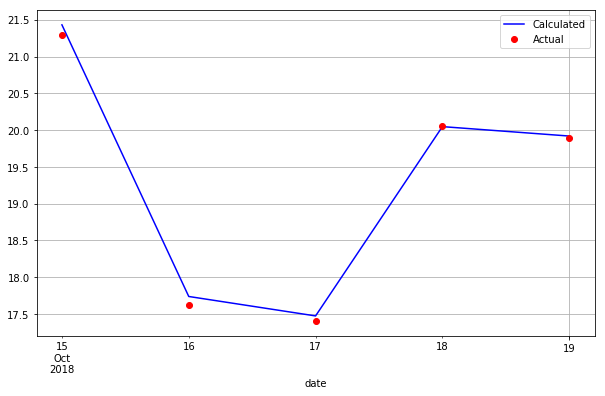

In [ ]:
df_merged = pd.DataFrame({
    'Calculated': pd_calcs['VIX'],
    'Actual': df_vix,
})
df_merged.plot(figsize=(10, 6), grid=True, style=['b', 'ro']);